C:\Users\Kunal\AppData\Local\Temp\ipykernel_8508\263416030.py:12: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df['order_date'] = pd.to_datetime(df['order_date'], errors='coerce')
C:\Users\Kunal\AppData\Local\Temp\ipykernel_8508\263416030.py:69: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=rfm, x='Segment', order=rfm['Segment'].value_counts().index, palette='Set2')
C:\Users\Kunal\AppData\Local\Temp\ipykernel_8508\263416030.py:74: UserWarning: Glyph 129504 (\N{BRAIN}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\ProgramData\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 129504 (\N{BRAIN}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


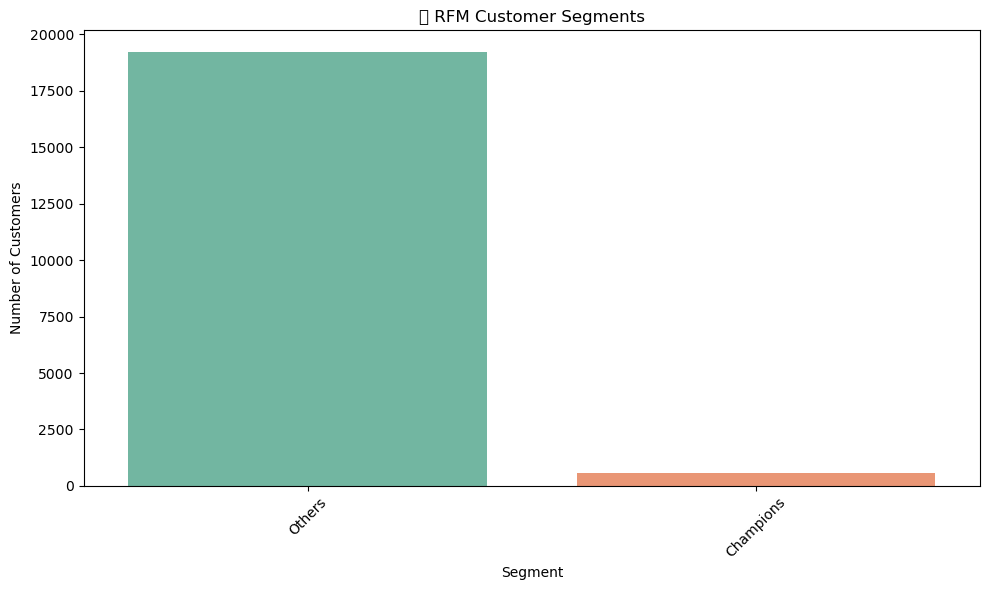

📊 RFM Segment Counts:

Segment
Others       19223
Champions      551
Name: count, dtype: int64

✅ Recommendations:
• 🎯 Focus campaigns on 'Champions' and 'Big Spenders'.
• 🚀 Reward 'Frequent Buyers' to build loyalty.
• 🧲 Try to re-engage 'Lost Customers' with offers.
• 💡 Use personalized marketing for each segment to improve retention.


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load your dataset
df = pd.read_csv("ecommerce_data_final_cleaned.csv")

# Rename columns for consistency
df = df.rename(columns={'value [USD]': 'total_revenue', 'date': 'order_date'})

# Convert date column to datetime
df['order_date'] = pd.to_datetime(df['order_date'], errors='coerce')

# Drop rows with missing customer_id or revenue or order_date
df = df.dropna(subset=['customer_id', 'order_date', 'total_revenue'])

# -------------------------------
# 1️⃣ Define a Reference Date
# -------------------------------
# Reference date = one day after the most recent purchase
ref_date = df['order_date'].max() + pd.Timedelta(days=1)

# -------------------------------
# 2️⃣ Group Data by Customer ID
# -------------------------------
rfm = df.groupby('customer_id').agg({
    'order_date': lambda x: (ref_date - x.max()).days,       # Recency
    'customer_id': 'count',                                  # Frequency
    'total_revenue': 'sum'                                   # Monetary
}).rename(columns={
    'order_date': 'Recency',
    'customer_id': 'Frequency',
    'total_revenue': 'Monetary'
}).reset_index()

# -------------------------------
# 3️⃣ Score Each RFM Metric
# -------------------------------
rfm['R_Score'] = pd.qcut(rfm['Recency'], 5, labels=[5, 4, 3, 2, 1])
rfm['F_Score'] = pd.qcut(rfm['Frequency'].rank(method='first'), 5, labels=[1, 2, 3, 4, 5])
rfm['M_Score'] = pd.qcut(rfm['Monetary'], 5, labels=[1, 2, 3, 4, 5])

# Combine RFM Score
rfm['RFM_Score'] = rfm['R_Score'].astype(str) + rfm['F_Score'].astype(str) + rfm['M_Score'].astype(str)

# -------------------------------
# 4️⃣ Segment Customers
# -------------------------------
def rfm_segment(row):
    if row['RFM_Score'] == '555':
        return 'Champions'
    elif row['R_Score'] == '5':
        return 'Loyal Customers'
    elif row['R_Score'] == '1':
        return 'Lost Customers'
    elif row['F_Score'] == '5':
        return 'Frequent Buyers'
    elif row['M_Score'] == '5':
        return 'Big Spenders'
    else:
        return 'Others'

rfm['Segment'] = rfm.apply(rfm_segment, axis=1)

# -------------------------------
# 5️⃣ Visualize Segments
# -------------------------------
plt.figure(figsize=(10, 6))
sns.countplot(data=rfm, x='Segment', order=rfm['Segment'].value_counts().index, palette='Set2')
plt.title("🧠 RFM Customer Segments")
plt.ylabel("Number of Customers")
plt.xlabel("Segment")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# -------------------------------
# 6️⃣ Summary of Key Insights
# -------------------------------
print("📊 RFM Segment Counts:\n")
print(rfm['Segment'].value_counts())

print("\n✅ Recommendations:")
print("• 🎯 Focus campaigns on 'Champions' and 'Big Spenders'.")
print("• 🚀 Reward 'Frequent Buyers' to build loyalty.")
print("• 🧲 Try to re-engage 'Lost Customers' with offers.")
print("• 💡 Use personalized marketing for each segment to improve retention.")
